In [1]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt         
%matplotlib inline 
import warnings        

In [2]:
train_data= pd.read_csv("Desktop/Project/train.csv")

test_data= pd.read_csv("Desktop/Project/test.csv")
print(train_data.head(5))

   Loan.ID  Current.Loan.Amount        Term  Credit.Score  \
0        0                17879  Short Term         739.0   
1        1             99999999   Long Term         619.0   
2        3             99999999  Short Term         738.0   
3        4                11200  Short Term         738.0   
4        5                 3608  Short Term         731.0   

  Years.in.current.job Home.Ownership  Annual.Income             Purpose  \
0              6 years  Home Mortgage        95357.0  Debt Consolidation   
1              6 years           Rent        54406.0  Debt Consolidation   
2    less than  1 year           Rent        40480.0       Medical Bills   
3              4 years           Rent        53965.0  Debt Consolidation   
4            10+ years  Home Mortgage        47709.0   Home Improvements   

   Monthly.Debt  Years.of.Credit.History  Months.since.last.delinquent  \
0       1509.82                     34.4                           5.0   
1       1065.45             

In [3]:
train_original=train_data.copy() 
test_original=test_data.copy()

In [4]:
train_data.dtypes

Loan.ID                           int64
Current.Loan.Amount               int64
Term                             object
Credit.Score                    float64
Years.in.current.job             object
Home.Ownership                   object
Annual.Income                   float64
Purpose                          object
Monthly.Debt                    float64
Years.of.Credit.History         float64
Months.since.last.delinquent    float64
Number.of.Open.Accounts           int64
Number.of.Credit.Problems         int64
Current.Credit.Balance            int64
Maximum.Open.Credit               int64
Bankruptcies                    float64
Tax.Liens                       float64
Loan.Status                       int64
dtype: object

In [5]:
test_data.dtypes

Loan.ID                           int64
Current.Loan.Amount               int64
Term                             object
Credit.Score                    float64
Years.in.current.job             object
Home.Ownership                   object
Annual.Income                   float64
Purpose                          object
Monthly.Debt                    float64
Years.of.Credit.History         float64
Months.since.last.delinquent    float64
Number.of.Open.Accounts           int64
Number.of.Credit.Problems         int64
Current.Credit.Balance            int64
Maximum.Open.Credit               int64
Bankruptcies                    float64
Tax.Liens                       float64
Loan.Status                     float64
dtype: object

In [6]:
train_data.shape ,test_data.shape

((60804, 18), (23386, 18))

In [7]:
train_data['Loan.Status'].value_counts(normalize=True)

1    0.759457
0    0.240543
Name: Loan.Status, dtype: float64

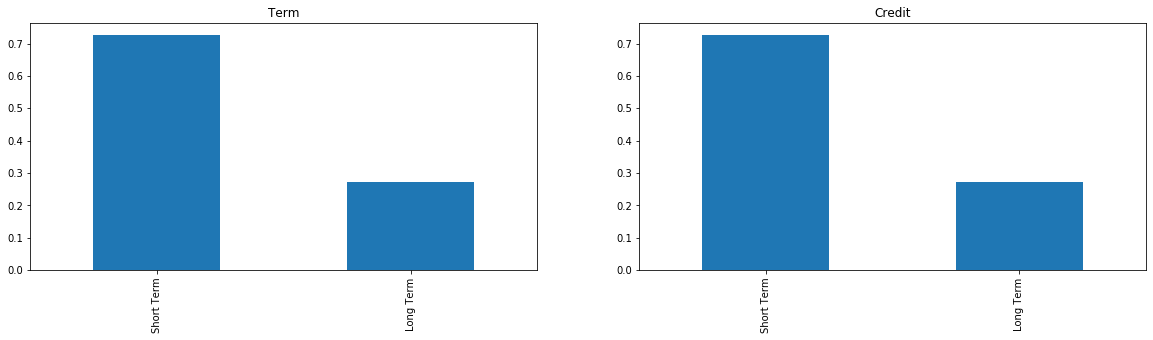

In [8]:
plt.figure(1)
plt.subplot(221) 
train_data['Term'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Term') 
plt.subplot(222)
train_data['Term'].value_counts(normalize=True).plot.bar(title= 'Credit') 

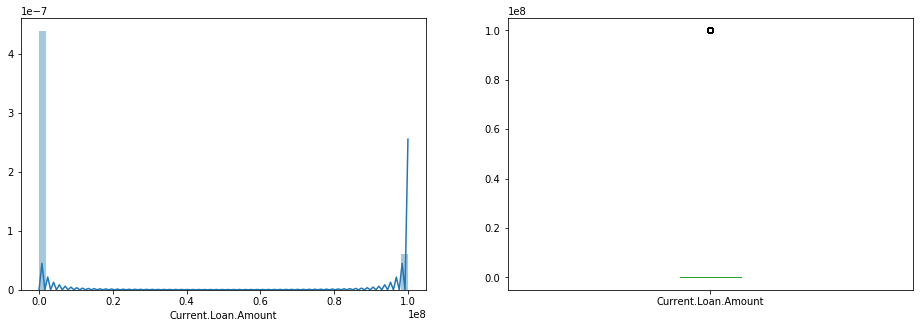

In [9]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train_data['Current.Loan.Amount']); 

plt.subplot(122)
train_data['Current.Loan.Amount'].plot.box(figsize=(16,5)) 
plt.show()

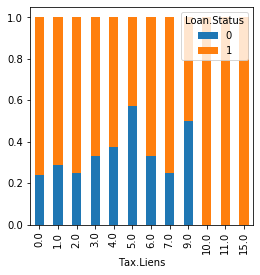

In [10]:
Gender=pd.crosstab(train_data['Tax.Liens'],train_data['Loan.Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

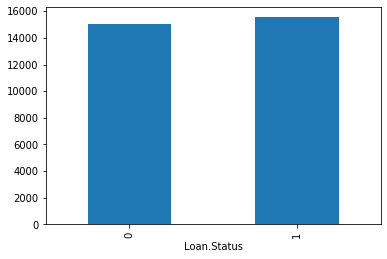

In [11]:
train_data.groupby('Loan.Status')['Current.Credit.Balance'].mean().plot.bar()

In [12]:
train_data.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                    12229
Years.in.current.job             2529
Home.Ownership                      0
Annual.Income                   12229
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    32475
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                      127
Tax.Liens                           2
Loan.Status                         0
dtype: int64

In [13]:
train_data['Credit.Score'].median(),train_data['Annual.Income'].median(),train_data['Months.since.last.delinquent'].median()


(726.0, 61576.0, 32.0)

In [14]:
train_data['Credit.Score'].fillna(train_data['Credit.Score'].median(), inplace=True)

In [15]:
train_data['Annual.Income'].fillna(train_data['Annual.Income'].median(), inplace=True)

In [16]:
train_data['Months.since.last.delinquent'].fillna(train_data['Months.since.last.delinquent'].median(), inplace=True)

In [17]:
train_data.isnull().sum()

Loan.ID                            0
Current.Loan.Amount                0
Term                               0
Credit.Score                       0
Years.in.current.job            2529
Home.Ownership                     0
Annual.Income                      0
Purpose                            0
Monthly.Debt                       0
Years.of.Credit.History            0
Months.since.last.delinquent       0
Number.of.Open.Accounts            0
Number.of.Credit.Problems          0
Current.Credit.Balance             0
Maximum.Open.Credit                0
Bankruptcies                     127
Tax.Liens                          2
Loan.Status                        0
dtype: int64

In [18]:
test_data['Credit.Score'].fillna(test_data['Credit.Score'].median(), inplace=True)

In [19]:
test_data['Annual.Income'].fillna(test_data['Annual.Income'].median(), inplace=True)

In [20]:
test_data['Months.since.last.delinquent'].fillna(test_data['Months.since.last.delinquent'].median(), inplace=True)

In [21]:
train_data['Credit.Score'] = np.log(train_data['Credit.Score']) 

In [22]:
train_data['Annual.Income'] = np.log(train_data['Annual.Income']) 

In [23]:
test_data['Credit.Score'] = np.log(test_data['Credit.Score']) 

In [24]:
test_data['Current.Loan.Amount'] = np.log(test_data['Current.Loan.Amount'])

In [25]:
test_data['Annual.Income'] = np.log(test_data['Annual.Income'])

In [26]:
train_data['Current.Loan.Amount'] = np.log(train_data['Current.Loan.Amount'])

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60804 entries, 0 to 60803
Data columns (total 18 columns):
Loan.ID                         60804 non-null int64
Current.Loan.Amount             60804 non-null float64
Term                            60804 non-null object
Credit.Score                    60804 non-null float64
Years.in.current.job            58275 non-null object
Home.Ownership                  60804 non-null object
Annual.Income                   60804 non-null float64
Purpose                         60804 non-null object
Monthly.Debt                    60804 non-null float64
Years.of.Credit.History         60804 non-null float64
Months.since.last.delinquent    60804 non-null float64
Number.of.Open.Accounts         60804 non-null int64
Number.of.Credit.Problems       60804 non-null int64
Current.Credit.Balance          60804 non-null int64
Maximum.Open.Credit             60804 non-null int64
Bankruptcies                    60677 non-null float64
Tax.Liens                

In [28]:
train_data[train_data['Current.Credit.Balance']<1]=1
test_data[test_data['Current.Credit.Balance']<1]=1
train_data['Current.Credit.Balance'] = np.log(train_data['Current.Credit.Balance'])
test_data['Current.Credit.Balance'] = np.log(test_data['Current.Credit.Balance'])



In [29]:
train_data=train_data.drop(['Term','Years.in.current.job','Home.Ownership','Purpose','Years.of.Credit.History','Number.of.Open.Accounts','Number.of.Credit.Problems','Maximum.Open.Credit','Bankruptcies','Tax.Liens','Loan.Status'] ,axis = 1)

In [30]:
test_data=test_data.drop(['Loan.ID','Term','Years.in.current.job','Home.Ownership','Purpose','Years.of.Credit.History','Number.of.Open.Accounts','Number.of.Credit.Problems','Maximum.Open.Credit','Bankruptcies','Tax.Liens','Loan.Status'] ,axis = 1)

In [46]:
p=train_original['Maximum.Open.Credit']
p.isnull().sum()
p[p==0]=1
p=np.log(p)
q=test_original['Maximum.Open.Credit']
q.isnull().sum()
q[q==0]=1
q=np.log(q)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [47]:
train_data['Term']=train_original['Term']

In [48]:
test_data['Term']=test_original['Term']

In [49]:
train_data.head(5)

,Loan.ID,Current.Loan.Amount,Credit.Score,Annual.Income,Monthly.Debt,Months.since.last.delinquent,Current.Credit.Balance,Term_Long Term,Term_Short Term,Term
0,0,9.791382,6.605298,11.465383,1509.82,5.0,10.085226,0,1,Short Term
1,1,18.420681,6.428105,10.904230,1065.45,32.0,10.040550,1,0,Long Term
2,3,18.420681,6.603944,10.608563,573.47,60.0,8.284757,0,1,Short Term
3,4,9.323669,6.603944,10.896091,1358.11,32.0,9.374328,0,1,Short Term
4,5,8.190909,6.594413,10.772875,339.93,47.0,10.039285,0,1,Short Term


In [50]:
train_data=pd.get_dummies(train_data)

In [51]:
test_data=pd.get_dummies(test_data)
test_data['Maximum.Open.Credit']=q

In [52]:
y=train_original['Loan.Status']

In [53]:
x=train_data

x=x.drop('Loan.ID',axis=1)
x['Maximum.Open.Credit']=p;

x=x.drop('Monthly.Debt',axis=1)




In [62]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.5)

In [63]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [64]:
model = LogisticRegression() 
model.fit(x_train, y_train)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
pred_cv = model.predict(x_cv)

In [67]:
accuracy_score(y_cv,pred_cv)

0.8089599368462601

In [69]:
k=test_original['Current.Credit.Balance']
k[k<1]=1
k=np.log(k)
test_data['Current.Credit.Balance']=k
test_data.info(),x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23386 entries, 0 to 23385
Data columns (total 11 columns):
Current.Loan.Amount             23386 non-null float64
Credit.Score                    23386 non-null float64
Annual.Income                   23386 non-null float64
Monthly.Debt                    23386 non-null float64
Months.since.last.delinquent    23386 non-null float64
Current.Credit.Balance          23386 non-null float64
Term_Long Term                  23386 non-null uint8
Term_Short Term                 23386 non-null uint8
Maximum.Open.Credit             23386 non-null float64
Term_Long Term                  23386 non-null uint8
Term_Short Term                 23386 non-null uint8
dtypes: float64(7), uint8(4)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60804 entries, 0 to 60803
Data columns (total 10 columns):
Current.Loan.Amount             60804 non-null float64
Credit.Score                    60804 non-null float64
Annual.Income            

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(None, None)

In [68]:
pred_test = model.predict(test_data)
test_data.head(1)

ValueError: X has 11 features per sample; expecting 10

In [ ]:
Submission=pd.read_csv("Desktop/Project/SubmissionSample.csv")

In [ ]:
Submission.head(5)

In [ ]:
Submission['Loan.Status']=pred_test

In [ ]:
Submission['Loan.ID']=test_original['Loan.ID']

In [ ]:
Submission.info()

In [ ]:
Submission.info()

In [ ]:
Submission.head(10)

In [ ]:
pd.DataFrame(Submission, columns=['Loan.ID','Loan.Status']).to_csv('SubmissionSamples31.csv')

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
       

In [ ]:
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10) 
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i=i+ 1
    
    

In [ ]:
import pandas as pd 

In [ ]:
df=pd.read_csv("Desktop/SubmissionSample.csv")

In [ ]:
df.head(5)

In [ ]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
df.head()

In [ ]:
pd.DataFrame(df, columns=['Loan.ID','Loan.Status']).to_csv('SubmissionSamples1.csv')